In [1]:
import matplotlib.pyplot as plt
import numpy as np


# useful functions

In [316]:
def surface_generator(subsurface, t):
    '''
    this function generates a new layer with zero as its sublayer.
    inorder to mount the new layer on the last layer simply just add the output of this
    function with sublayer
    '''
    
    surface = subsurface
    L = int(subsurface.shape[0])
    for i in range(t):
        rand = int(np.random.random()*L)



        if rand == L-1:
            a = rand-1
            b = rand
            c = 0
            shift = np.argmin([surface[a], surface[b], surface[c]])
            if shift==2:
                surface[c]+=1
            else:
                surface[shift+rand-1]+=1

        elif rand == 0:
            a = L-1
            b = rand
            c = rand+1
            shift = np.argmin([surface[a], surface[b], surface[c]])
            if shift == 0:
                surface[a] +=1
            else:
                surface[shift+rand-1]+=1

        else:
            a = rand-1
            b = rand
            c = rand+1
            shift = np.argmin([surface[a], surface[b], surface[c]])

            surface[shift-1 + rand] +=1 

    return surface




In [326]:
surface = np.zeros((100,))
surface[50] = 100

In [327]:
surface = surface_generator(surface,1000)
#plt.plot(surface)
#subsurface_points = np.array([(i,0) for i in range(10)])
#points = display(subsurface_points, surface, 's')
#subsurface = surface
#surface = surface_generator(subsurface, 100)
#points = display(points, surface, 'rs')

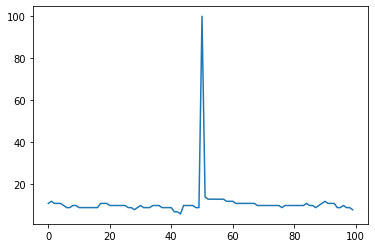

In [328]:
surface
plt.plot(surface)

In [329]:
def display(subsurface_points, surface, marker):
  points = []
  for i in range(surface.shape[0]):
    
    for j in range(int(surface[i])):
      points.append((i,j + subsurface_points[subsurface_points[:,0]==i][-1][1] ))
    
  points = np.array(points)
  plt.plot(points[:,0], points[:,1], marker)
  return points
  

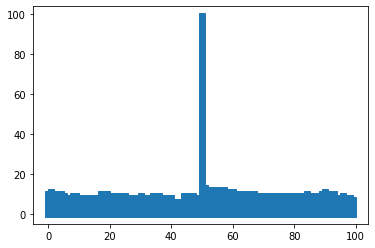

In [330]:
subsurface_points = np.array([(i,0) for i in range(100)])
points = display(subsurface_points, surface, 's')

In [337]:
def surface_accumulator_analyzer(subsurface, step, upperlimit):   
    '''
    will get a subsurface and add particles to it
    '''
    #subsurface = np.zeros((L,))
    L = subsurface.shape[0]
    surface = surface_generator(subsurface, 2) #+ subsurface
    N_total = 2
    std_list = []

    particle_release_range= [step**i for i in range(2,upperlimit)]
    for i in particle_release_range:
        std_list.append((N_total, surface.std()))
        subsurface = surface
        surface = surface_generator(subsurface,i) #+ subsurface
        N_total +=i
        print(np.log2(i))
    return np.array(std_list)

In [338]:
def Experiment_runner(subsurface,step, upperlimit,number_of_experiments):
    std_of_experiments = []
    #number_of_experiments = 5
    for i in range(number_of_experiments):
        data = surface_accumulator_analyzer(subsurface,step,upperlimit)
        std_of_experiments.append(data)
        print('experiment number {} is running'.format(i+1))
    return std_of_experiments

In [339]:
def mean_std_calculator(std_of_experiments, number_of_experiments):
    
    mean_std = np.zeros(std_of_experiments[0].shape)
    for i in range(number_of_experiments):
        mean_std += std_of_experiments[i]
    mean_std[:,1]/= number_of_experiments
    mean_std[:,0] = std_of_experiments[0][:,0] 
    
    return mean_std

# Some plots

In [343]:
L = 1000
subsurface = np.zeros((L,))
data1 = surface_accumulator_analyzer(subsurface,2, 23)
#data2 = surface_accumulator_analyzer(subsurface,t,1.5,15)
#data3 = surface_accumulator_analyzer(subsurface,t,1.6,15)

2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0


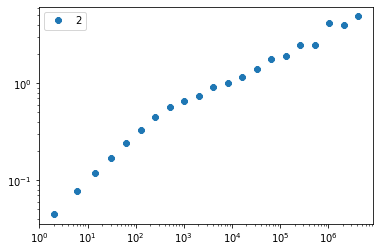

In [347]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(data1[:,0], data1[:,1],'8', label='2')
#ax.loglog(data2[:,0], data2[:,1],'8', label='1.5')
#ax.loglog(data3[:,0], data3[:,1],'8', label='1.6')
ax.legend()

# Running experiments

In [345]:
L = 5000
subsurface = np.zeros((L,))
step = 1.6
upperlimit = 20
number_of_experiments = 1
#std_of_experiments = Experiment_runner(subdurface,t,step, upperlimit, number_of_experiments)
data = surface_accumulator_analyzer(subsurface,2,23)

2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0


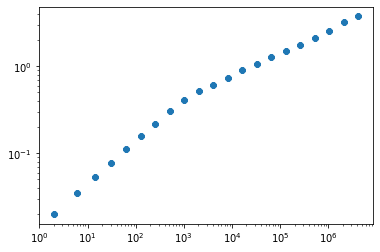

In [346]:
plt.loglog(data[:,0], data[:,1],'8', label='1.2')

# Experiments

In [384]:
L = 100
std_of_experiments = Experiment_runner(np.zeros((L,)), 2,22,7)

2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
experiment number 1 is running
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
experiment number 2 is running
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
experiment number 3 is running
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
experiment number 4 is running
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
experiment number 5 is running
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
experiment number 6 is running
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
experiment number 7 is running


In [385]:
std_of_experiments


[array([[2.00000000e+00, 1.40000000e-01],
        [6.00000000e+00, 2.37486842e-01],
        [1.40000000e+01, 3.46987031e-01],
        [3.00000000e+01, 5.00000000e-01],
        [6.20000000e+01, 6.12862138e-01],
        [1.26000000e+02, 7.15821207e-01],
        [2.54000000e+02, 1.02391406e+00],
        [5.10000000e+02, 1.10905365e+00],
        [1.02200000e+03, 1.37535450e+00],
        [2.04600000e+03, 1.26822711e+00],
        [4.09400000e+03, 1.67224400e+00],
        [8.19000000e+03, 1.75783958e+00],
        [1.63820000e+04, 1.55164429e+00],
        [3.27660000e+04, 1.35070352e+00],
        [6.55340000e+04, 2.19189416e+00],
        [1.31070000e+05, 1.27671453e+00],
        [2.62142000e+05, 1.42253295e+00],
        [5.24286000e+05, 1.78336760e+00],
        [1.04857400e+06, 2.97193540e+00],
        [2.09715000e+06, 2.03224014e+00]]),
 array([[2.00000000e+00, 2.51364277e+00],
        [6.00000000e+00, 2.54039367e+00],
        [1.40000000e+01, 2.56015625e+00],
        [3.00000000e+01, 2.57246

In [386]:
mean_std = mean_std_calculator(std_of_experiments, number_of_experiments)

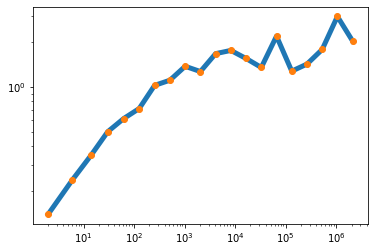

In [387]:
plt.loglog(mean_std[:,0], mean_std[:,1], linewidth=5)
plt.loglog(mean_std[:,0], mean_std[:,1], 'o')
#for i in range(4):
 #   plt.loglog(std_of_experiments[i][:,0], std_of_experiments[i][:,1],'o',alpha=1)
#plt.errorbar(std_of_experiments[0][:,0], std_of_experiments[0][:,1],yerr=1)

